**setting up an environment for natural language processing (NLP) and text analysis.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

--> A Python library for numerical operations is called NumPy. Large, multi-dimensional arrays and matrices are supported, as are mathematical operations on these arrays.

--> Pandas is a potent Python data manipulation library. It offers convenient data structures for working with structured data, such as DataFrames.

--> A Python plotting library called Matplotlib is used to create visualizations. Plots can be displayed inline in Jupyter Notebooks using the %matplotlib inline magic command.

--> Seaborn is a Matplotlib-based statistical data visualization library. It offers a sophisticated drawing interface for creating eye-catching and educational statistical graphics.

--> Python's regular expression module is called re. Working with regular expressions—patterns that describe text patterns—is one of its uses.

--> A library called WordCloud is used to create word clouds. Word clouds are graphic depictions of the terms that appear most frequently in a particular set of textual data.

--> A strong library for handling human language data is called NLTK (Natural Language Toolkit). For tasks like tokenization, stemming, lemmatization, and more, it offers tools.

--> This line downloads particular files required for particular NLTK features. Tokenizers, WordNet, Open Multilingual Wordnet, stopwords, and the VADER (Valence Aware Dictionary and Sentiment Reasoner) lexicon are among the resources.

--> Stopwords are frequently used words (like "the," "and") that are eliminated during text analysis.

--> punkt: A sentence tokenizer with prior training.

Wordnet is an English lexical database.

--> Open Multilingual Wordnet (omw-1.4).

The sentiment analysis vocabulary is called vader_lexicon.

In [ ]:
# For the beginning, lets read the dataset "netflix_movie_description.txt" file which have been uploaded into the Google collaboratory path where the script has saved into the collab window to begin with the text mining and later the sentimental analysis:
netflix_movie_category_list = pd.read_csv("netflix_movie_description.txt", sep = "\t", header = None) #given the variable name "netflix_movie_category_list"

# Assigning the column names for the dataset to make it easier to reference and work later
netflix_movie_category_list.columns = ["show_title", "cast_and_crew", "listed_in", "storyline", "show_type"]

# So as to display the first few rows of the DataFrame
netflix_movie_category_list.head()

show_title  \
0                  Blood & Water   
1                      Ganglands   
2                  Midnight Mass   
3                        Sankofa   
4  The Great British Baking Show   

                                       cast_and_crew  \
0  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
2  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
3  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
4  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   

                                           listed_in  \
0    International TV Shows, TV Dramas, TV Mysteries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                 TV Dramas, TV Horror, TV Mysteries   
3   Dramas, Independent Movies, International Movies   
4                       British TV Shows, Reality TV   

                                           storyline        show_type  
0  After crossing paths at a party, a Cape Town t...  Television Show  
1  To protect his family from a powerful drug lor...  Television Show  
2  The arrival of a charismatic young priest brin...  Television Show  
3  On a photo shoot in Ghana, an American model s...            Movie  
4  A talented batch of amateur bakers face off in...  Television Show

In [ ]:
#In order to get the count of "Movie" and "Television Show" values in show_type column field, we can use the below written code
print("\n Data Labels with the count:")
print(netflix_movie_category_list.groupby("show_type").count())


 Data Labels with the count:
                 show_title  cast_and_crew  listed_in  storyline
show_type                                                       
Movie                  4128           4128       4128       4128
Television Show        1691           1691       1691       1691


In [ ]:
stop_words = nltk.corpus.stopwords.words('english') #defined the stop_words variable by using NLTK's built-in English stop words. This variable now contains a list of common English words that are often considered as stopwords in text analysis.

#In order to apply the various preprocessing steps into our dataset to make it even analysis- friendly, we need to implement a few steps

def preprocessed_text(text_data):
  # Tokenize the text data using a regular expression pattern
  tokenized_document_values = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text_data) #This uses a regular expression pattern to tokenize the input text. It extracts words, numbers, and apostrophes while ignoring other characters. Hence evaluated the tokenization pre-processing procedure

  # Remove stopwords and convert words to lowercase
  cleaned_token_values = [word.lower() for word in tokenized_document_values if word.lower() not in stop_words] #Remove stopwords from the tokenized_document_value

  # Apply stemming using Porter Stemmer
  stemmed_text_values = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_token_values] #this in turn do the stemming procedure in the pre-processing technology
  return stemmed_text_values

In [ ]:
#apply the pre-processing function onto our dataset so as to get a cleaned dataset. We are hereby using the column fields "show_title", "cast_and_crew", "listed_in", "storyline" so as to do the cleaning up and pre-processing steps.
netflix_movie_category_list['show_title'] = netflix_movie_category_list['show_title'].apply(preprocessed_text)
netflix_movie_category_list['cast_and_crew'] = netflix_movie_category_list['cast_and_crew'].apply(preprocessed_text)
netflix_movie_category_list['listed_in'] = netflix_movie_category_list['listed_in'].apply(preprocessed_text)
netflix_movie_category_list['storyline'] = netflix_movie_category_list['storyline'].apply(preprocessed_text)
netflix_movie_category_list.head()

show_title  \
0                [blood, water]   
1                    [gangland]   
2              [midnight, mass]   
3                     [sankofa]   
4  [great, british, bake, show]   

                                       cast_and_crew  \
0  [ama, qamata, khosi, ngema, gail, mabalan, tha...   
1  [sami, bouajila, traci, gotoa, samuel, jouy, n...   
2  [kate, siegel, zach, gilford, hamish, linklat,...   
3  [kofi, ghanaba, oyafunmik, ogunlano, alexandra...   
4  [mel, giedroyc, sue, perkin, mari, berri, paul...   

                                           listed_in  \
0         [intern, tv, show, tv, drama, tv, mysteri]   
1  [crime, tv, show, intern, tv, show, tv, action...   
2               [tv, drama, tv, horror, tv, mysteri]   
3              [drama, independ, movi, intern, movi]   
4                   [british, tv, show, realiti, tv]   

                                           storyline        show_type  
0  [cross, path, parti, cape, town, teen, set, pr...  Television Show  
1  [protect, famili, power, drug, lord, skill, th...  Television Show  
2  [arriv, charismat, young, priest, bring, glori...  Television Show  
3  [photo, shoot, ghana, american, model, slip, b...            Movie  
4  [talent, batch, amateur, baker, face, 10, week...  Television Show

--> Depending on the specific objectives of your analysis and the characteristics of the data, combining text from several columns into a single string may or may not be appropriate. Here are some things to think about:

  --> **Information Loss:** When text from several columns is combined, there may be some information lost, particularly if each column's text has a different context or meaning. Combining the columns could mask the differences if each one represents a distinct aspect of the data. Since, for a review, we only should depend upon the key words of it e.g., good, great, bad, enemy, hero, etc., these all words will automatically pass through the pre-processing steps and hence our dataset crucial information is safe.

  --> **Contextual Integrity**: If the text in each column has a specific context or meaning, combining them could result in a loss of the contextual integrity. For example, if one column contains genres and another contains actor names, combining them might make it harder to distinguish between the two in the analysis. But, we are not concatenating any column features here. Hence, contextual integrity is not questioned!

  --> **Dimensionality**: Combining text from multiple columns increases the dimensionality of your data. This can be both an advantage and a disadvantage. It might capture more information, but it could also make your analysis more complex, especially if the combined text is very long. We are not concatenating any features here since all we need is in the review tab and we are separately analysing each feature along with the other. Thus, the dimentionality won't be an issue

Hence, we are splitting the complete dataset into four to analyze each attribute towards resulting category type of the show.

**First Category: analysing "show_title" and "show_type"**


In [ ]:
netflix_movie_title = netflix_movie_category_list.iloc[:, [0,4]] #selecting specific columns from the DataFrame "netflix_movie_category_list" and creating a new DataFrame named "netflix_movie_title" containing only the "show_title" and "show_type" columns.

# Display the shapes of the resulting parts
display(netflix_movie_title)


show_title        show_type
0                   [blood, water]  Television Show
1                       [gangland]  Television Show
2                 [midnight, mass]  Television Show
3                        [sankofa]            Movie
4     [great, british, bake, show]  Television Show
...                            ...              ...
5814        [zindagi, gulzar, hai]  Television Show
5815                     [zinzana]            Movie
5816                  [zombieland]            Movie
5817                        [zoom]            Movie
5818                      [zubaan]            Movie

[5819 rows x 2 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #This is a scikit-learn class for converting a collection of text documents to a matrix of token counts.

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the 'show_title' column into a bag-of-words representation
vectorized_title = vectorizer.fit_transform(netflix_movie_title['show_title'].map(''.join))

# Convert the sparse matrix to a DataFrame
vectorized_title = pd.DataFrame(vectorized_title.toarray())

# Display the first few rows of the resulting DataFrame
vectorized_title.head()

0     1     2     3     4     5     6     7     8     9     ...  5793  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   5794  5795  5796  5797  5798  5799  5800  5801  5802  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 5803 columns]

In [ ]:
from sklearn.model_selection import train_test_split #scikit-learn's train_test_split function to split your data into training and testing sets for machine learning.

# stored the column feature "show_type" into a new variable called "target_value" (dependent variable)
target_value = netflix_movie_title['show_type']

# Split the data into training and testing sets
vectorized_title_train_value, vectorized_title_test_value, target_train_value, target_test_value = train_test_split(
    vectorized_title, # Features (independent variables)
    target_value, # Target variable (dependent variable)
    train_size = 0.75, # Proportion of the dataset to include in the training split
    test_size = 0.25, # Proportion of the dataset to include in the testing split
    random_state = 99 # Random seed for reproducibility
    )


<Axes: xlabel='show_type', ylabel='count'>

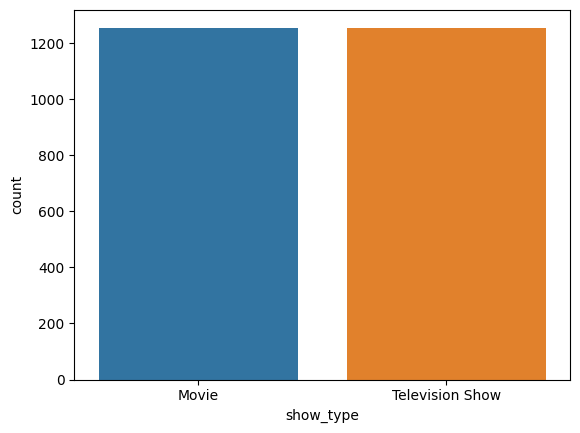

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #using the RandomUnderSampler from the imbalanced-learn library to address class imbalance by undersampling the majority class.

# Create a RandomUnderSampler instance
resampler = RandomUnderSampler(random_state = 0)

# Undersample the training data
vectorized_title_train_undersampled, target_train_undersampled = resampler.fit_resample(
    vectorized_title_train_value, # Features (bag-of-words representation)
    target_train_value # Target variable ("show_type")
    )

# Visualize the class distribution after undersampling
sns.countplot(x = target_train_undersampled)

In [ ]:
from sklearn.naive_bayes import MultinomialNB #scikit-learn's MultinomialNB (Multinomial Naive Bayes) classifier to train a model on the undersampled training data.

# Create an instance of the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model on the undersampled training data
model.fit(vectorized_title_train_undersampled, target_train_undersampled)

# Optionally, creating another instance of the Multinomial Naive Bayes model (not necessary)
MultinomialNB()

MultinomialNB()

In [ ]:
# Make predictions on the test set
target_value_predict = model.predict(vectorized_title_test_value)

# Evaluate the model's performance
from sklearn import metrics

# Compute accuracy
accuracy = metrics.accuracy_score(target_test_value, target_value_predict)
print('Accuracy: %.2f\n\n' % (accuracy))
print("****************************************************************")

# Print confusion matrix
confusion_matrix = metrics.confusion_matrix(target_test_value, target_value_predict)
print("Confusion Matrix:\n")
print(confusion_matrix, '\n\n')

print("****************************************************************")

# Generate and print classification report
result = metrics.classification_report(target_test_value, target_value_predict)
print("Classification Report:\n")
print(result)

Accuracy: 0.31


****************************************************************
Confusion Matrix:

[[ 22 997]
 [ 10 426]] 


****************************************************************
Classification Report:

                 precision    recall  f1-score   support

          Movie       0.69      0.02      0.04      1019
Television Show       0.30      0.98      0.46       436

       accuracy                           0.31      1455
      macro avg       0.49      0.50      0.25      1455
   weighted avg       0.57      0.31      0.17      1455



**sentimental analysis**
  
--> Sentiment analysis, commonly referred to as opinion mining, is a natural language processing (NLP) method for figuring out the sentiment that is being expressed in a text.

--> Finding out if the text has a positive, negative, or neutral sentiment is the aim

--> Sentiment analysis is extensively employed in numerous applications, such as product reviews, social media monitoring, and customer feedback analysis.

In [ ]:
# Read the dataset from a text file using tab ('\t') as the separator
netflix_movie_category_list = pd.read_csv("netflix_movie_description.txt", sep="\t", header=None)

# Set column names for better understanding of the data
netflix_movie_category_list.columns = ["show_title", "cast_and_crew", "listed_in", "storyline", "show_type"]

# Display the first few rows of the DataFrame
netflix_movie_category_list.head()


show_title  \
0                  Blood & Water   
1                      Ganglands   
2                  Midnight Mass   
3                        Sankofa   
4  The Great British Baking Show   

                                       cast_and_crew  \
0  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
2  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
3  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
4  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   

                                           listed_in  \
0    International TV Shows, TV Dramas, TV Mysteries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                 TV Dramas, TV Horror, TV Mysteries   
3   Dramas, Independent Movies, International Movies   
4                       British TV Shows, Reality TV   

                                           storyline        show_type  
0  After crossing paths at a party, a Cape Town t...  Television Show  
1  To protect his family from a powerful drug lor...  Television Show  
2  The arrival of a charismatic young priest brin...  Television Show  
3  On a photo shoot in Ghana, an American model s...            Movie  
4  A talented batch of amateur bakers face off in...  Television Show

In [ ]:
netflix_movie_category_list.describe() #provides a summary of statistical measures for each column in a DataFrame. It includes statistics such as count, unique, top, freq.

show_title       cast_and_crew        listed_in  \
count            5819                5819             5819   
unique           5819                5594              458   
top     Blood & Water  David Attenborough  Stand-Up Comedy   
freq                1                  19              295   

                                                storyline show_type  
count                                                5819      5819  
unique                                               5802         2  
top     Paranormal activity at a lush, abandoned prope...     Movie  
freq                                                    4      4128

In [ ]:
#using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from NLTK to analyze the sentiment of the "storyline" column in your netflix_movie_category_list DataFrame.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer instance
sentiment = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each storyline
netflix_movie_category_list['compound'] = [sentiment.polarity_scores(storyline)['compound'] for storyline in netflix_movie_category_list['storyline']]
netflix_movie_category_list['neg'] = [sentiment.polarity_scores(storyline)['neg'] for storyline in netflix_movie_category_list['storyline']]
netflix_movie_category_list['neu'] = [sentiment.polarity_scores(storyline)['neu'] for storyline in netflix_movie_category_list['storyline']]
netflix_movie_category_list['pos'] = [sentiment.polarity_scores(storyline)['pos'] for storyline in netflix_movie_category_list['storyline']]

In [ ]:
netflix_movie_category_list.head() #display the first few rows of the DataFrame, including the original columns and the newly added sentiment analysis scores ('compound', 'neg', 'neu', 'pos').

show_title  \
0                  Blood & Water   
1                      Ganglands   
2                  Midnight Mass   
3                        Sankofa   
4  The Great British Baking Show   

                                       cast_and_crew  \
0  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
2  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
3  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
4  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   

                                           listed_in  \
0    International TV Shows, TV Dramas, TV Mysteries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                 TV Dramas, TV Horror, TV Mysteries   
3   Dramas, Independent Movies, International Movies   
4                       British TV Shows, Reality TV   

                                           storyline        show_type  \
0  After crossing paths at a party, a Cape Town t...  Television Show   
1  To protect his family from a powerful drug lor...  Television Show   
2  The arrival of a charismatic young priest brin...  Television Show   
3  On a photo shoot in Ghana, an American model s...            Movie   
4  A talented batch of amateur bakers face off in...  Television Show   

   compound    neg    neu    pos  
0   -0.1531  0.118  0.786  0.096  
1   -0.7783  0.306  0.546  0.148  
2    0.1280  0.175  0.669  0.156  
3   -0.7845  0.256  0.744  0.000  
4    0.9382  0.000  0.580  0.420

In [ ]:
netflix_movie_category_list[['compound','neg','neu','pos']].describe() #provide a summary of statistics for the specified columns ('compound', 'neg', 'neu', 'pos').

compound          neg          neu          pos
count  5819.000000  5819.000000  5819.000000  5819.000000
mean      0.024797     0.116056     0.757723     0.126219
std       0.556356     0.115726     0.136343     0.113870
min      -0.973200     0.000000     0.325000     0.000000
25%      -0.476700     0.000000     0.662000     0.000000
50%       0.000000     0.101000     0.761000     0.112000
75%       0.526700     0.191000     0.861000     0.203000
max       0.970900     0.619000     1.000000     0.664000

<Axes: xlabel='compound', ylabel='Count'>

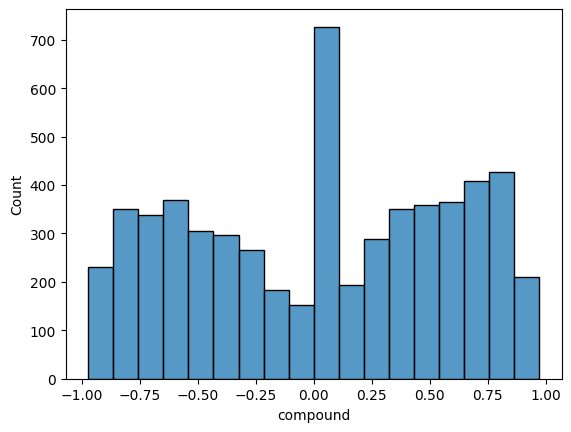

In [ ]:
sns.histplot(netflix_movie_category_list['compound']) # Create a histogram of the 'compound' sentiment scores

In [ ]:
netflix_movie_category_list.median() #calculate and display the median values for each numerical column in the DataFrame.

<ipython-input-27-e2adb2e9e519>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  netflix_movie_category_list.median() #calculate and display the median values for each numerical column in the DataFrame.


compound    0.000
neg         0.101
neu         0.761
pos         0.112
dtype: float64

<Axes: xlabel='pos', ylabel='Count'>

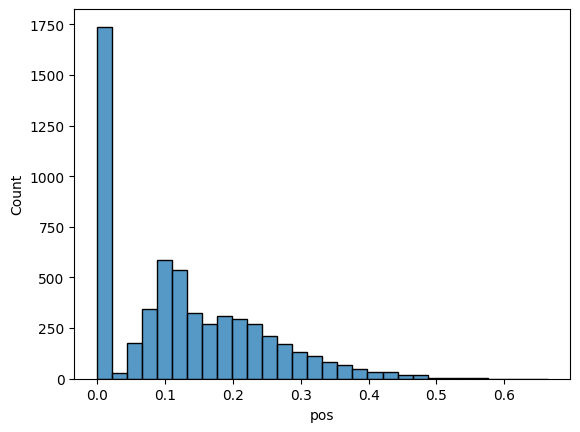

In [ ]:
sns.histplot(netflix_movie_category_list['pos']) # Create a histogram of the 'pos' sentiment scores

<Axes: xlabel='neg', ylabel='Count'>

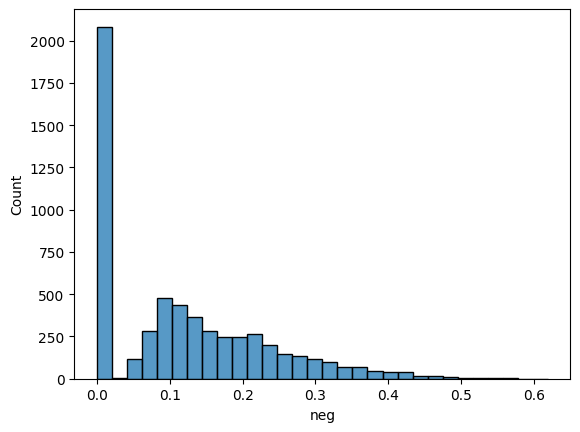

In [ ]:
sns.histplot(netflix_movie_category_list['neg']) #using Seaborn's histplot function to create a histogram with specified bins and adding a kernel density estimate (KDE) to the plot.

In [ ]:
#since there is a neutral categorization based on the posiitve and negative storyline of the nextflix movie description, we can find out how many negative storylines we have according to the "show_type"

(netflix_movie_category_list['compound']<=0).groupby(netflix_movie_category_list['show_type']).sum()

show_type
Movie              2270
Television Show     763
Name: compound, dtype: int64

In [ ]:
#likewise we can also find out the negative storylines we have according to the "listed_in" attribute

(netflix_movie_category_list['compound']<=0).groupby(netflix_movie_category_list['listed_in']).sum()

listed_in
Action & Adventure                                              75
Action & Adventure, Anime Features                               1
Action & Adventure, Anime Features, Children & Family Movies     2
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         2
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                         6
Thrillers                                                       38
Name: compound, Length: 458, dtype: int64

In [ ]:
#hence, to compare and get an overall view, lets calculate the percentage of total storyline descriptions according to the "show_type" category

neg_storyline_percent = pd.DataFrame((netflix_movie_category_list['compound']<=0).groupby(netflix_movie_category_list['show_type']).sum() #This calculates the count of negative storylines for each 'show_type'.
/netflix_movie_category_list['show_type'].groupby(netflix_movie_category_list['show_type']).count()*100, #This calculates the total count of storylines for each 'show_type'. and '/' performs element-wise division to calculate the percentage of negative storylines.
                                     columns = ['% negative storyline']).sort_values(by = '% negative storyline') #This sorts the DataFrame by the percentage of negative storylines.
neg_storyline_percent

% negative storyline
show_type                            
Television Show              45.12123
Movie                        54.99031

In [ ]:
#hence, to compare and get an overall view, lets calculate the percentage of total storyline descriptions according to the "listed_in" category

neg_storyline_percent_in_listed = pd.DataFrame((netflix_movie_category_list['compound']<=0).groupby(netflix_movie_category_list['listed_in']).sum() #This calculates the count of negative storylines for each 'listed_in'.
/netflix_movie_category_list['listed_in'].groupby(netflix_movie_category_list['listed_in']).count()*100, #This calculates the total count of storylines for each 'listed_in'. and '/' performs element-wise division to calculate the percentage of negative storylines.
                                     columns = ['% negative storyline']).sort_values(by = '% negative storyline') #This sorts the DataFrame by the percentage of negative storylines.
neg_storyline_percent_in_listed

% negative storyline
listed_in                                                               
Crime TV Shows, Romantic TV Shows, TV Dramas                         0.0
International TV Shows, Stand-Up Comedy & Talk ...                   0.0
Comedies, Cult Movies, Dramas                                        0.0
Classic Movies, Comedies, Music & Musicals                           0.0
Classic Movies, Comedies, Independent Movies                         0.0
...                                                                  ...
Classic Movies, Music & Musicals                                   100.0
Horror Movies, Independent Movies, Sci-Fi & Fan...                 100.0
Comedies, Cult Movies, Horror Movies                               100.0
Comedies, Cult Movies, Sci-Fi & Fantasy                            100.0
International TV Shows, TV Horror, TV Sci-Fi & ...                 100.0

[458 rows x 1 columns]

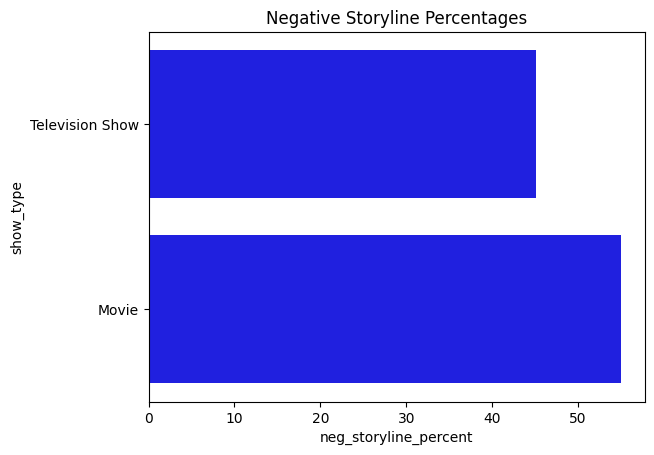

In [ ]:
sns.barplot( data = neg_storyline_percent, x = '% negative storyline', y=neg_storyline_percent.index, color='blue') # Create a bar plot
# Add labels and title
plt.xlabel('neg_storyline_percent')
plt.ylabel('show_type')
plt.title('Negative Storyline Percentages')

# Show the plot
plt.show()


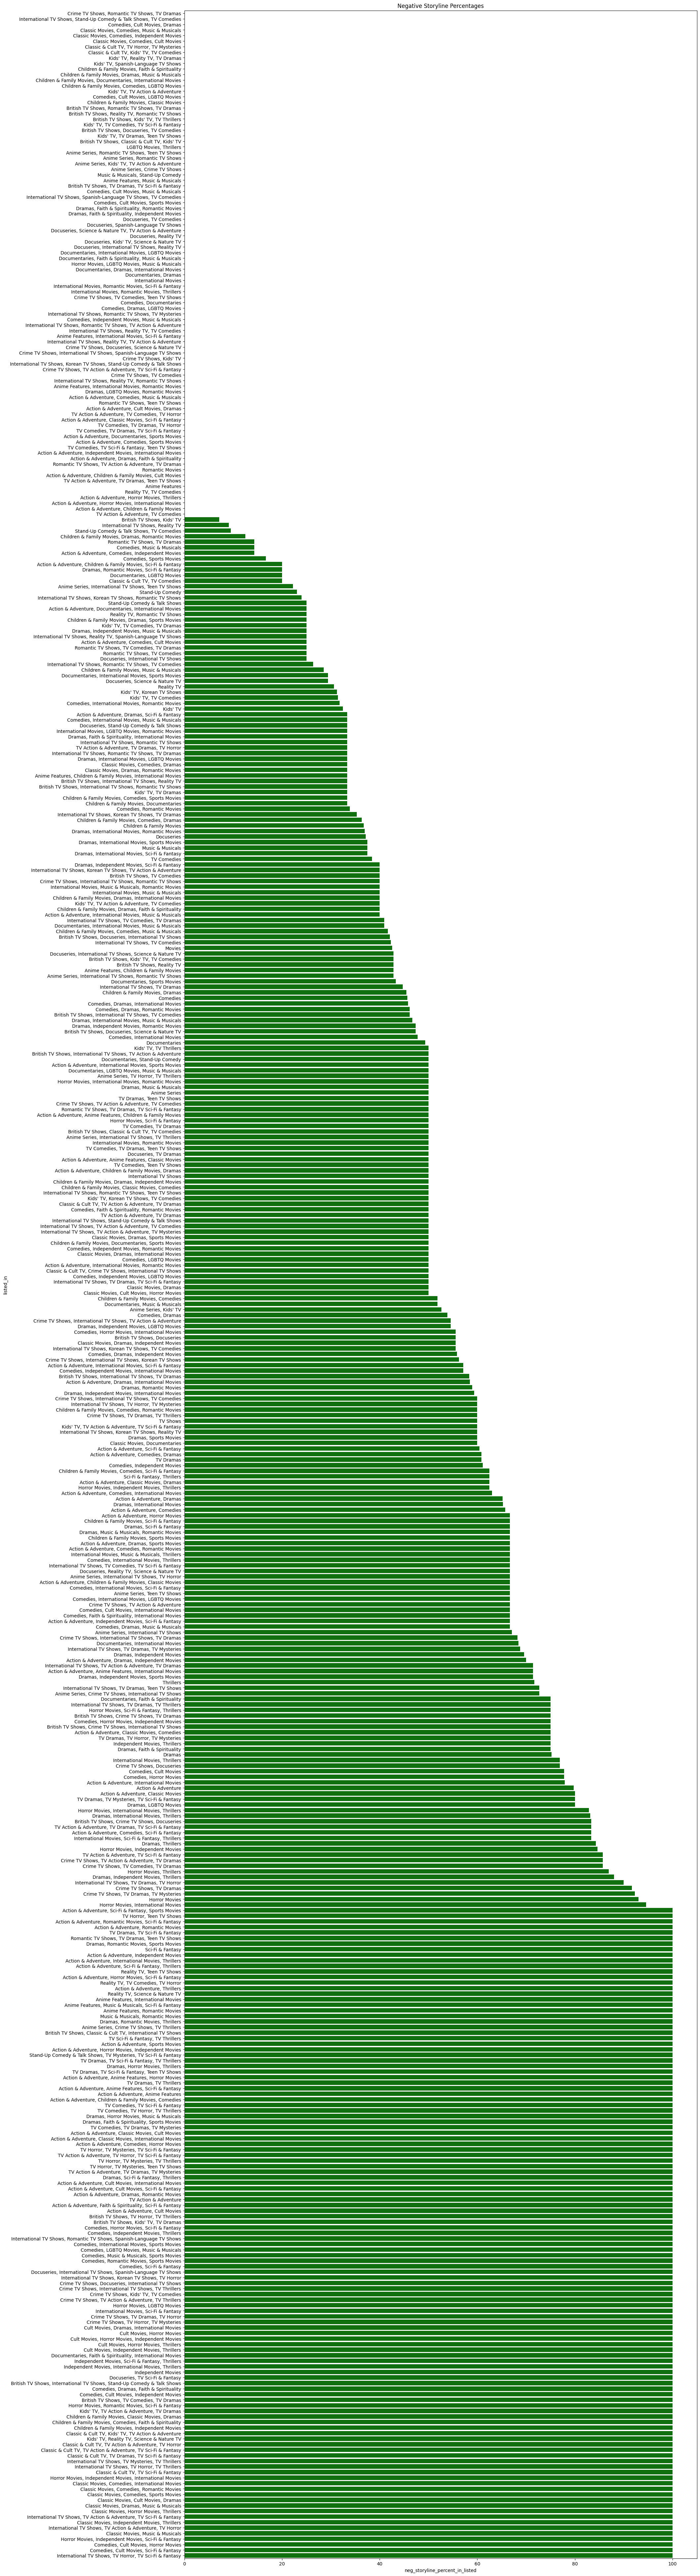

In [ ]:
# Set a reasonable figure size
plt.figure(figsize=(20, 100))

# Create a horizontal bar plot
sns.barplot( data = neg_storyline_percent_in_listed , x = '% negative storyline', y=neg_storyline_percent_in_listed.index, color='green')
# Add labels and title
plt.xlabel('neg_storyline_percent_in_listed')
plt.ylabel('listed_in')
plt.title('Negative Storyline Percentages')

# Show the plot
plt.show()


In [ ]:
# Generate the word cloud

netflix_movie_category_list['processed_category_list'] = netflix_movie_category_list['storyline'].apply(preprocessed_text)


In [ ]:
# filtering the netflix_movie_category_list DataFrame to create a subset (netflix_movie_category_list_p_set) containing only movies with a positive compound sentiment score.
netflix_movie_category_list_p_set = netflix_movie_category_list[(netflix_movie_category_list['show_type'] == 'Movie')
& (netflix_movie_category_list['compound']>0)] #"netflix_movie_category_list_p_set" contains only those rows that meet both criteria.

# Display the first few rows of the subset
netflix_movie_category_list_p_set.head()


show_title  \
8                                             Jeans   
10                                        Grown Ups   
12                                  Ankahi Kahaniya   
19                                           Jaws 3   
26  InuYasha the Movie 4: Fire on the Mystic Island   

                                        cast_and_crew  \
8   Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
10  Adam Sandler, Kevin James, Chris Rock, David S...   
12  Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...   
19  Dennis Quaid, Bess Armstrong, Simon MacCorkind...   
26  Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...   

                                            listed_in  \
8     Comedies, International Movies, Romantic Movies   
10                                           Comedies   
12   Dramas, Independent Movies, International Movies   
19       Action & Adventure, Horror Movies, Thrillers   
26  Action & Adventure, Anime Features, Internatio...   

                                            storyline show_type  compound  \
8   When the father of the man she loves insists t...     Movie    0.8176   
10  Mourning the loss of their beloved junior high...     Movie    0.3182   
12  As big city life buzzes around them, lonely so...     Movie    0.3400   
19  After the staff of a marine theme park try to ...     Movie    0.6249   
26  Ai, a young half-demon who has escaped from Ho...     Movie    0.4019   

      neg    neu    pos                            processed_category_list  
8   0.000  0.738  0.262  [father, man, love, insist, twin, son, marri, ...  
10  0.164  0.631  0.205  [mourn, loss, belov, junior, high, basketbal, ...  
12  0.189  0.609  0.202  [big, citi, life, buzz, around, lone, soul, di...  
19  0.000  0.864  0.136  [staff, marin, theme, park, tri, captur, young...  
26  0.000  0.891  0.109  [ai, young, half, demon, escap, horai, island,...

In [ ]:
# filtering the netflix_movie_category_list DataFrame to create a subset (netflix_movie_category_list_n_set) containing only movies with a non-positive (less than or equal to 0) compound sentiment score.
netflix_movie_category_list_n_set = netflix_movie_category_list[(netflix_movie_category_list['show_type'] == 'Movie')
& (netflix_movie_category_list['compound']<=0)] #"netflix_movie_category_list_n_set" contains only those rows that meet both criteria.

# Display the first few rows of the subset
netflix_movie_category_list_n_set.head()

show_title                                      cast_and_crew  \
3               Sankofa  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
7       Avvai Shanmughi  Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...   
11             Paranoia  Liam Hemsworth, Gary Oldman, Amber Heard, Harr...   
15  Birth of the Dragon  Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...   
17                 Jaws  Roy Scheider, Robert Shaw, Richard Dreyfuss, L...   

                                           listed_in  \
3   Dramas, Independent Movies, International Movies   
7                     Comedies, International Movies   
11                                         Thrillers   
15                        Action & Adventure, Dramas   
17        Action & Adventure, Classic Movies, Dramas   

                                            storyline show_type  compound  \
3   On a photo shoot in Ghana, an American model s...     Movie   -0.7845   
7   Newly divorced and denied visitation rights wi...     Movie   -0.5994   
11  Blackmailed by his company's CEO, a low-level ...     Movie   -0.4588   
15  A young Bruce Lee angers kung fu traditionalis...     Movie   -0.8402   
17  When an insatiable great white shark terrorize...     Movie   -0.5423   

      neg    neu    pos                            processed_category_list  
3   0.256  0.744  0.000  [photo, shoot, ghana, american, model, slip, b...  
7   0.189  0.811  0.000  [newli, divorc, deni, visit, right, daughter, ...  
11  0.143  0.857  0.000  [blackmail, company', ceo, low, level, employe...  
15  0.276  0.724  0.000  [young, bruce, lee, anger, kung, fu, tradition...  
17  0.248  0.619  0.134  [insati, great, white, shark, terror, amiti, i...

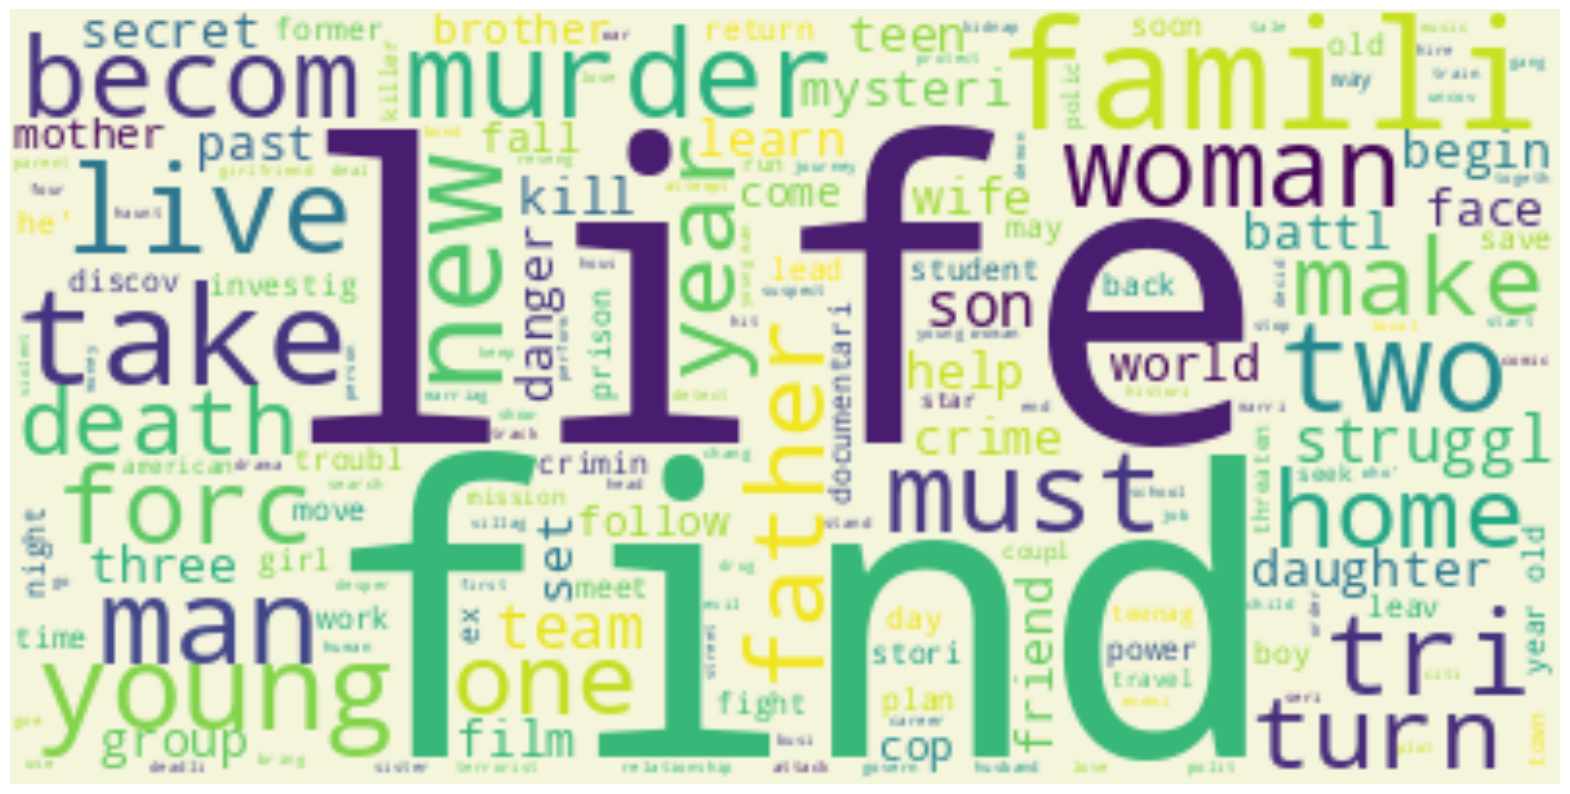

In [ ]:
# Concatenate all the words in the 'processed_category_list' column
negative_tokens = [word for storyline in netflix_movie_category_list_n_set['processed_category_list'] for word in storyline]

# Join the words into a single string with spaces
text = ' '.join(negative_tokens)

# Create a WordCloud object
wordcloud = WordCloud(background_color='beige').generate(text)

# Set the figure size
plt.figure(figsize=(20, 20))

# Display the WordCloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

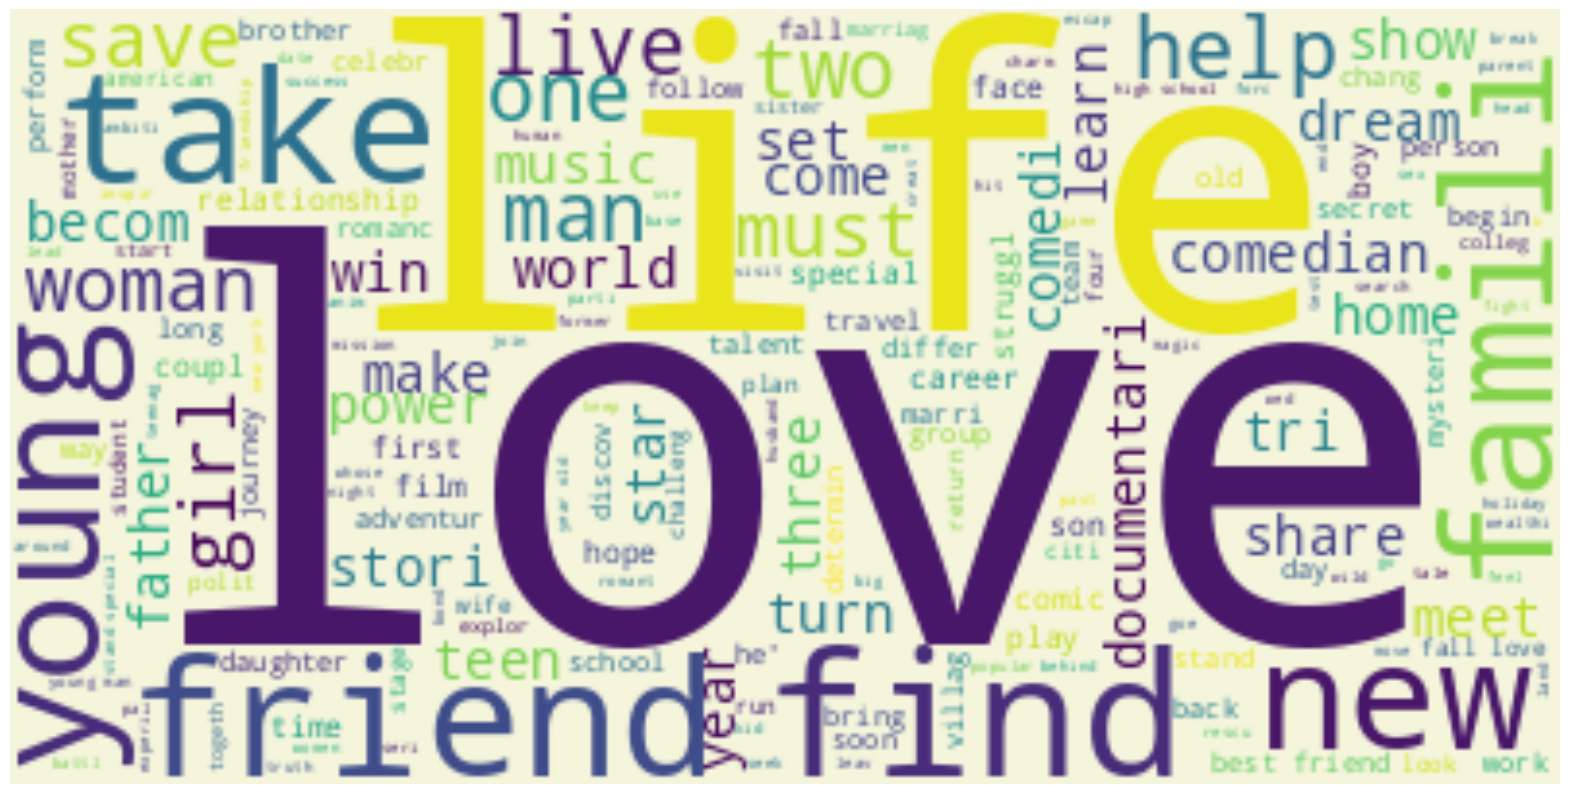

In [ ]:
# Concatenate all the words in the 'processed_category_list' column
positive_tokens = [word for storyline in netflix_movie_category_list_p_set['processed_category_list'] for word in storyline]

# Join the words into a single string with spaces
text = ' '.join(positive_tokens)

# Create a WordCloud object
wordcloud = WordCloud(background_color='beige').generate(text)

# Set the figure size
plt.figure(figsize=(20, 20))

# Display the WordCloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk.probability import FreqDist #class from nltk to compute the frequency distribution of tokens in positive_tokens.

# Create a frequency distribution of positive_tokens
positive_freqdist = FreqDist(positive_tokens)

# Display the top 20 most frequent tokens
positive_freqdist.tabulate(20)

    love   friend    young     life     find      new     take      man    woman     help      two  special   famili      get     live    stand      one comedian   comedi     year 
     252      195      175      172      156      148      142      121      119      114      113      113      111      109       98       97       91       89       88       86 


In [ ]:
from nltk.probability import FreqDist #class from NLTK to compute the frequency distribution of tokens in negative_tokens.

# Create a frequency distribution of negative_tokens
negative_freqdist = FreqDist(negative_tokens)

# Display the top 20 most frequent tokens
negative_freqdist.tabulate(20)

 young   life   find    man famili    new   take   year   must  woman    two    get murder   live  becom    tri   home   forc    old father 
   212    204    193    184    183    179    165    138    136    134    132    121    121    118    114    114    104    102     99     95 


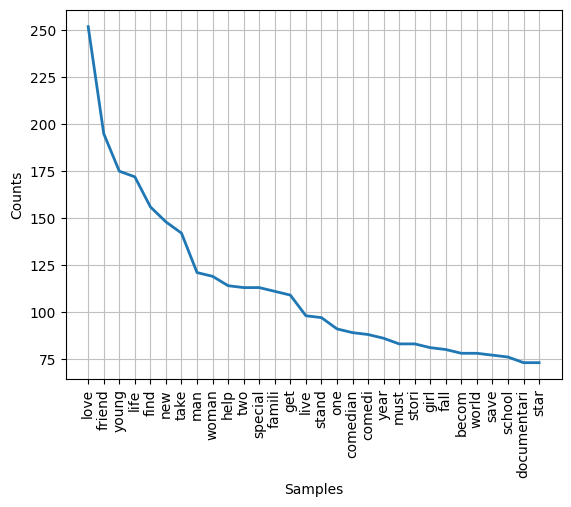

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Plot the top 30 most frequent positive tokens
positive_freqdist.plot(30)

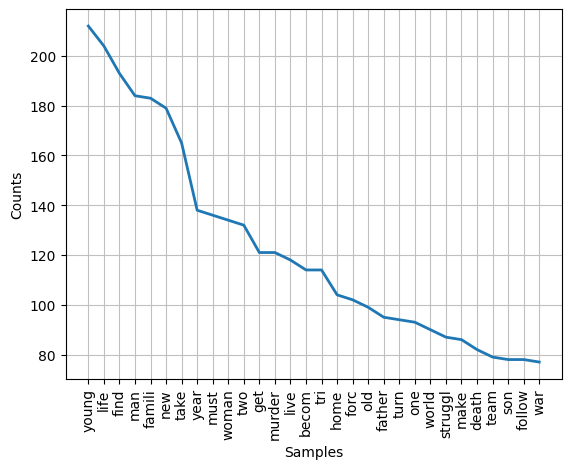

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Plot the top 30 most frequent negative tokens
negative_freqdist.plot(30)